# Histogram
diagram that show you distribution of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nba=pd.read_csv('nba.csv')
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [3]:
nba.dropna(subset=['Salary'],inplace=True)

In [4]:
nba.describe()

,Number,Age,Weight,Salary
count,446.000000,446.000000,446.000000,4.460000e+02
mean,17.681614,26.919283,221.753363,4.842684e+06
std,16.025597,4.398951,26.157899,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [5]:
nba.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     82
Salary       0
dtype: int64

(array([40., 65., 89., 76., 57., 52., 27., 18., 13.,  9.]),
 array([19. , 21.1, 23.2, 25.3, 27.4, 29.5, 31.6, 33.7, 35.8, 37.9, 40. ]),
 <a list of 10 Patch objects>)

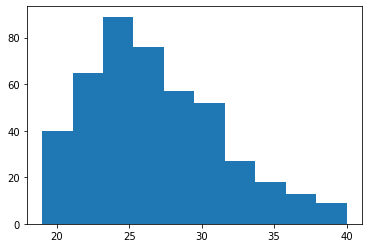

In [6]:
plt.hist(nba['Age'])

## Task 1
<img src="Task1.png">

(array([19., 46., 58., 75., 86., 84., 53., 19.,  5.,  1.]),
 array([161. , 175.6, 190.2, 204.8, 219.4, 234. , 248.6, 263.2, 277.8,
        292.4, 307. ]),
 <a list of 10 Patch objects>)

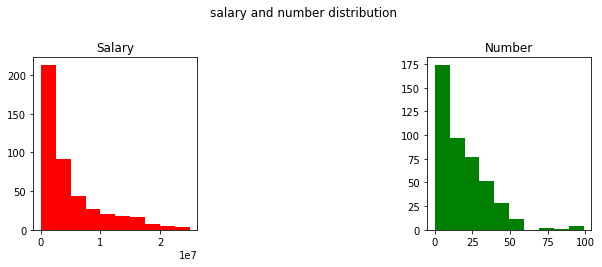

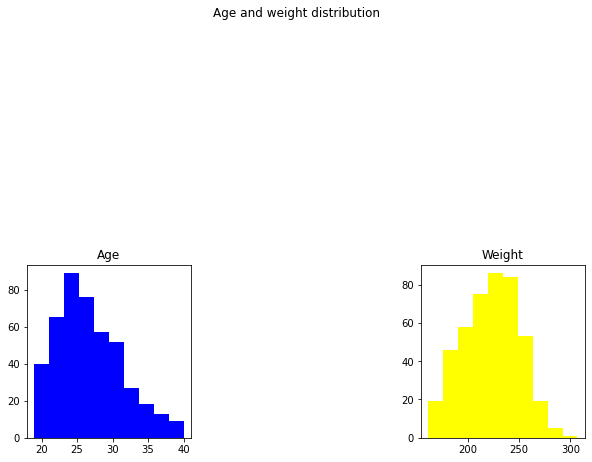

In [7]:
fig1=plt.figure(figsize=(10,7))
fig1.suptitle("salary and number distribution")
fig2=plt.figure(figsize=(10,7))
fig2.suptitle("Age and weight distribution")

ax1=fig1.add_subplot(231)
ax1.set_title('Salary')
ax1.hist(nba['Salary'],color='Red')

ax3=fig1.add_subplot(233)
ax3.set_title('Number')
ax3.hist(nba['Number'],color='Green')

ay1=fig2.add_subplot(234)
ay1.set_title('Age')
ay1.hist(nba['Age'],color='Blue')

ay2=fig2.add_subplot(236)
ay2.set_title('Weight')
ay2.hist(nba['Weight'],color='Yellow')

## Seaborn

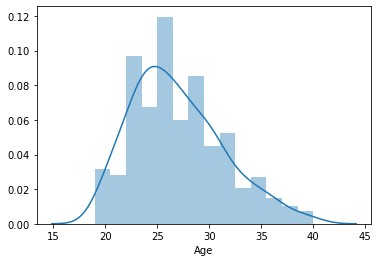

In [8]:
sns.distplot(nba['Age'])

## Tugas MPG
<img src='task2.png'>

In [9]:
mpg=sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Get merk

In [10]:
bren=lambda a:a.split()[0]
mpg['merk']=mpg['name'].map(bren)
# for i in range(len(mpg['merk'])):
#     mpg['merk'][i]=mpg['merk'][i].split()[0]
for i in range(len(mpg['merk'])):
    if mpg['merk'][i]=='chevy' or mpg['merk'][i]=='chevroelt':
        mpg['merk'][i]='chevrolet'
    elif mpg['merk'][i]=='toyouta':
        mpg['merk'][i]='toyota'
    elif mpg['merk'][i]=='maxda':
        mpg['merk'][i]='mazda'
    elif mpg['merk'][i]=='mercedes-benz':
        mpg['merk'][i]='mercedes'
    elif mpg['merk'][i]=='volkswagen' or mpg['merk'][i]=='vokswagen':
        mpg['merk'][i]='vw'
# mpg['merk'].unique()

### bikin database per merk
MPG, Origin

In [26]:
jumlah_mobil_pm={}
for i in mpg['merk']:
   jumlah_mobil_pm.update({i:len(mpg[mpg['merk']==i])})
jumlah_mobil_pm=pd.DataFrame([jumlah_mobil_pm]).T
jumlah_mobil_pm.rename({0:'jumlah'},inplace=True,axis=1)
jumlah_mobil_pm['origin'],jumlah_mobil_pm['mpg']='weh','weh'

In [40]:
origin={}
for i in mpg['merk']:
    origin.update({i:mpg[mpg['merk']==i]['origin'].reset_index()})
for i in range(len(jumlah_mobil_pm.index)):
    jumlah_mobil_pm['origin'][i]=origin[list(origin.keys())[i]].iloc[0][1]
for i in range(len(jumlah_mobil_pm.index)):
    jumlah_mobil_pm['mpg'][i]=mpg[mpg['merk']==list(origin.keys())[i]]['mpg'].mean()
jumlah_mobil_pm['mpg']=jumlah_mobil_pm['mpg'].astype('float')


In [28]:
mpg_negara={}
for i in mpg['origin']:
    mpg_negara.update({i:mpg[mpg['origin']==i]['mpg'].mean()})
mpg_negara=pd.DataFrame([mpg_negara]).T

### MEMBUAT VISUALISASI DATA

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

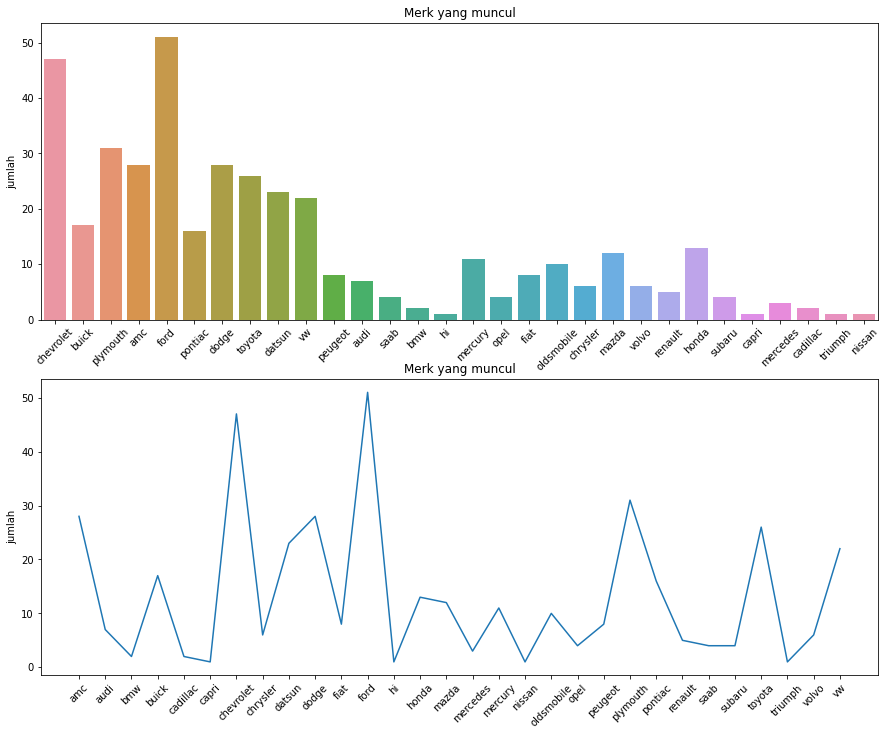

In [29]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plt.title('Merk yang muncul')
sns.barplot(jumlah_mobil_pm.index,jumlah_mobil_pm['jumlah'])
plt.xticks(rotation=45)

plt.subplot(212)
plt.title('Merk yang muncul')
sns.lineplot(jumlah_mobil_pm.index,jumlah_mobil_pm['jumlah'])
plt.xticks(rotation=45)

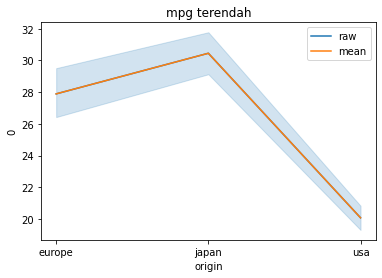

In [30]:
plt.title('mpg terendah')
sns.lineplot(y=mpg['mpg'],x=mpg['origin'],label='raw')
sns.lineplot(mpg_negara.index,mpg_negara[0],label='mean')
plt.legend()

chevrolet     20.2191
buick         19.1824
plymouth      21.7032
amc           18.2464
ford          19.6941
pontiac       20.0125
dodge         22.0607
toyota        28.1654
datsun         31.113
vw            31.8409
peugeot       23.6875
audi          26.7143
saab             23.9
bmw             23.75
hi                  9
mercury       19.1182
opel            25.75
fiat          28.9125
oldsmobile       21.1
chrysler      17.2667
mazda         30.0583
volvo         21.1167
renault         32.88
honda         33.7615
subaru         30.525
capri              25
mercedes      23.9667
cadillac        19.75
triumph            35
nissan             36
Name: mpg, dtype: object

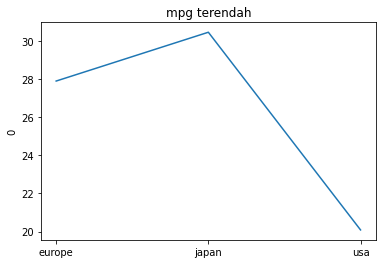

In [31]:
plt.title('mpg terendah')
sns.lineplot(mpg_negara.index,mpg_negara[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

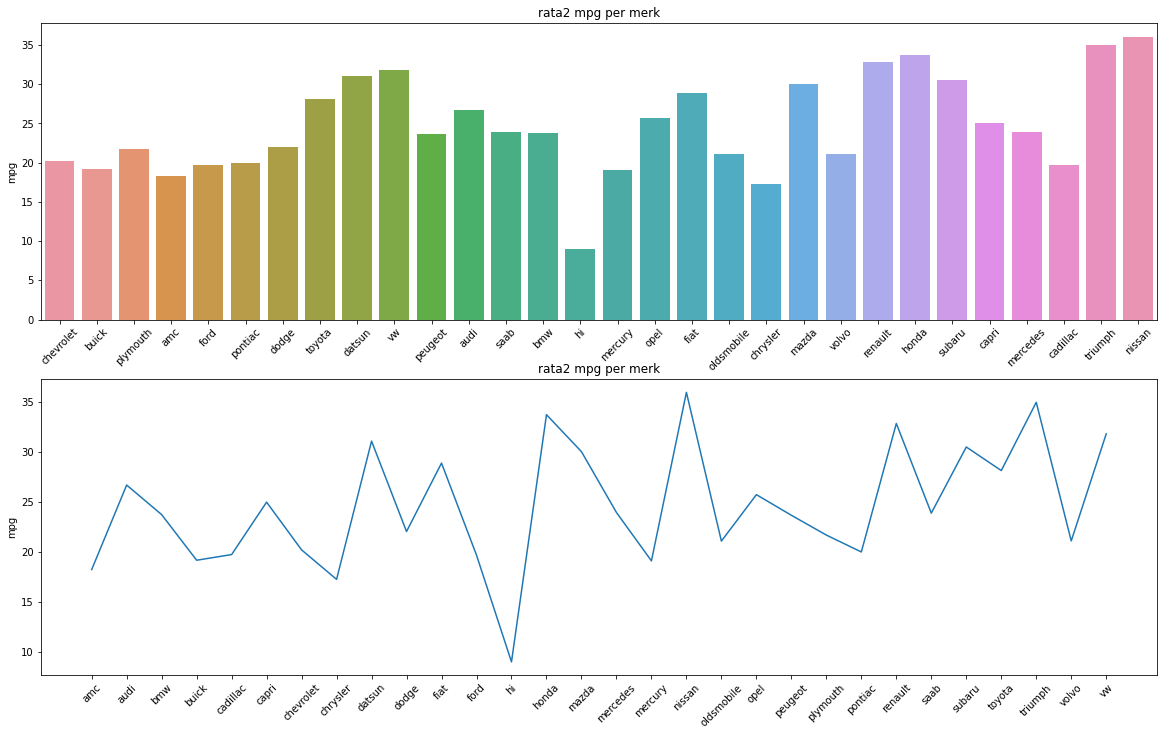

In [41]:
plt.suptitle('rata2 mpg per merk')
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
plt.title('rata2 mpg per merk')
sns.barplot(x=jumlah_mobil_pm.index,y=jumlah_mobil_pm['mpg'])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
plt.title('rata2 mpg per merk')
sns.lineplot(x=jumlah_mobil_pm.index,y=jumlah_mobil_pm['mpg'])
plt.xticks(rotation=45)

In [19]:
mpg[mpg['merk']=='bmw'].mean()['mpg']

23.75

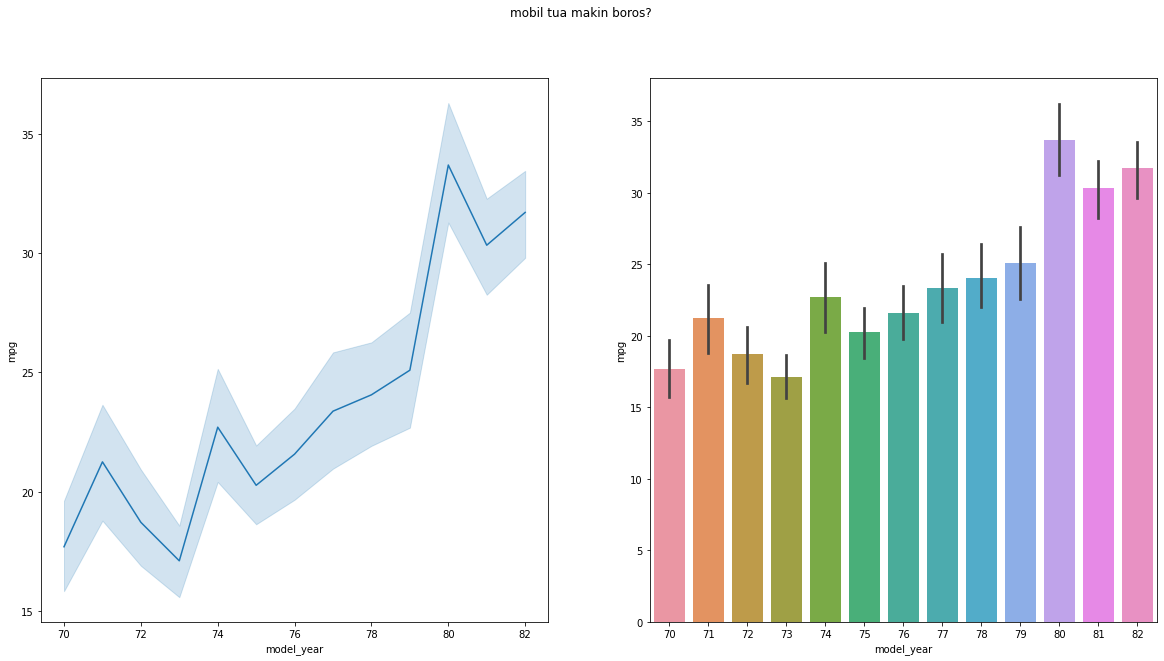

In [20]:
plt.figure(figsize=(20,10))
plt.suptitle('mobil tua makin boros?')
plt.subplot(1,2,1)
sns.lineplot(mpg['model_year'],mpg['mpg'])
plt.subplot(1,2,2)
sns.barplot(mpg['model_year'],mpg['mpg'])


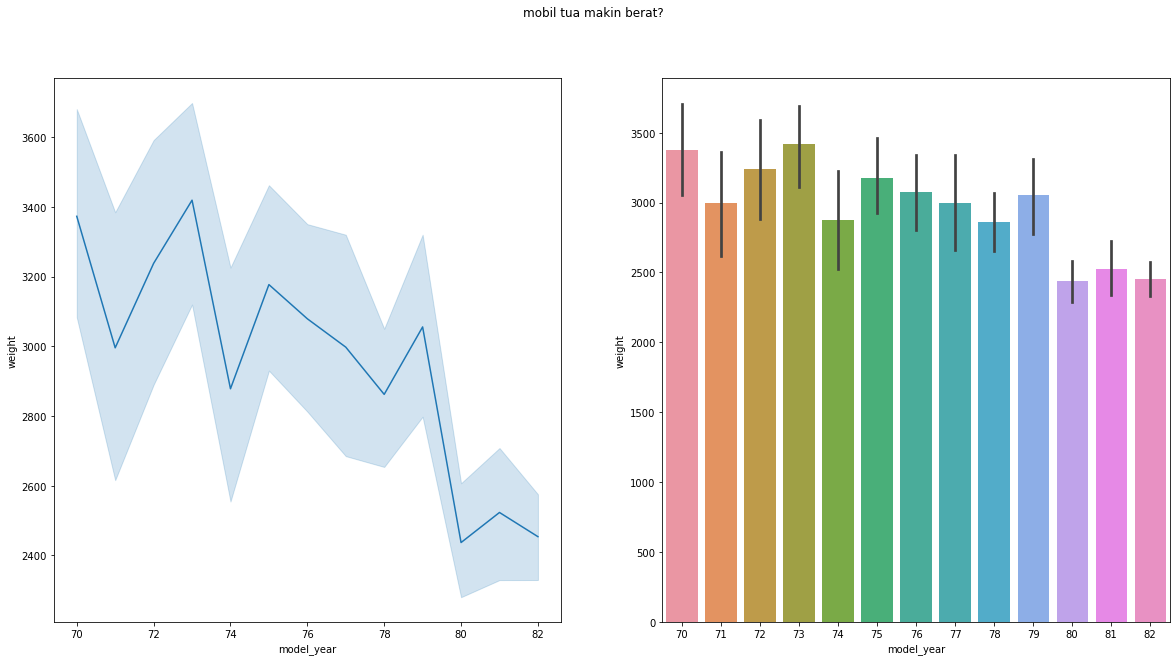

In [21]:
plt.figure(figsize=(20,10))
plt.suptitle('mobil tua makin berat?')
plt.subplot(1,2,1)
sns.lineplot(mpg['model_year'],mpg['weight'])
plt.subplot(1,2,2)
sns.barplot(mpg['model_year'],mpg['weight'])

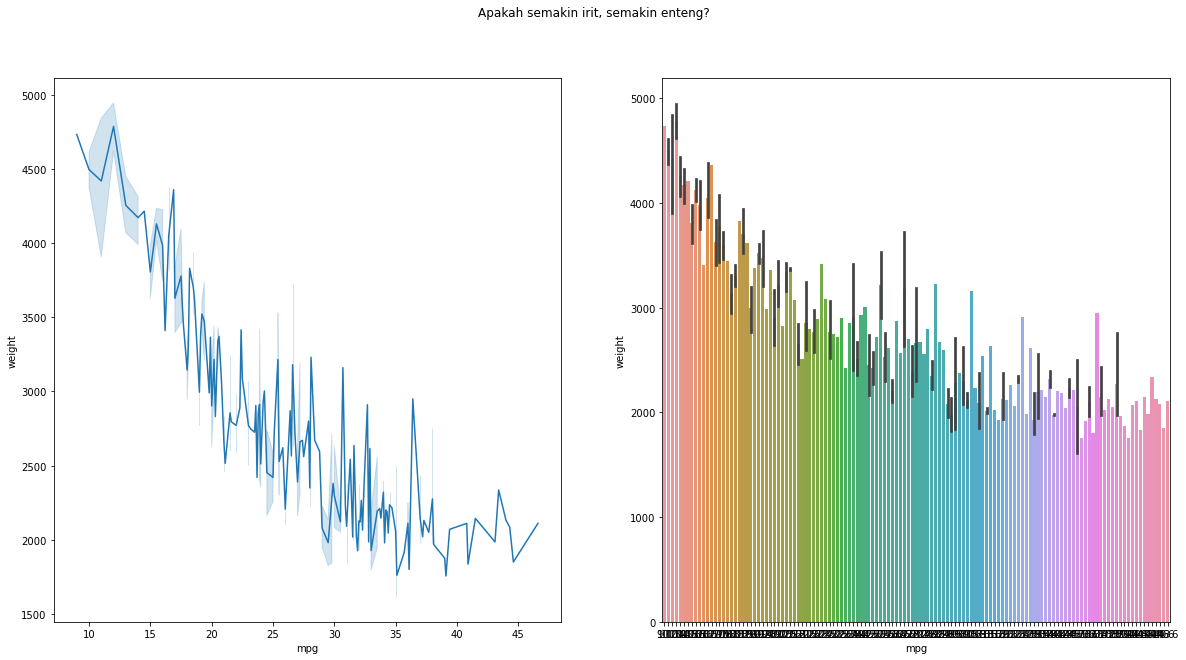

In [22]:
plt.figure(figsize=(20,10))
plt.suptitle('Apakah semakin irit, semakin enteng?')
plt.subplot(1,2,1)
sns.lineplot(mpg['mpg'],mpg['weight'])
plt.subplot(1,2,2)
sns.barplot(mpg['mpg'],mpg['weight'])

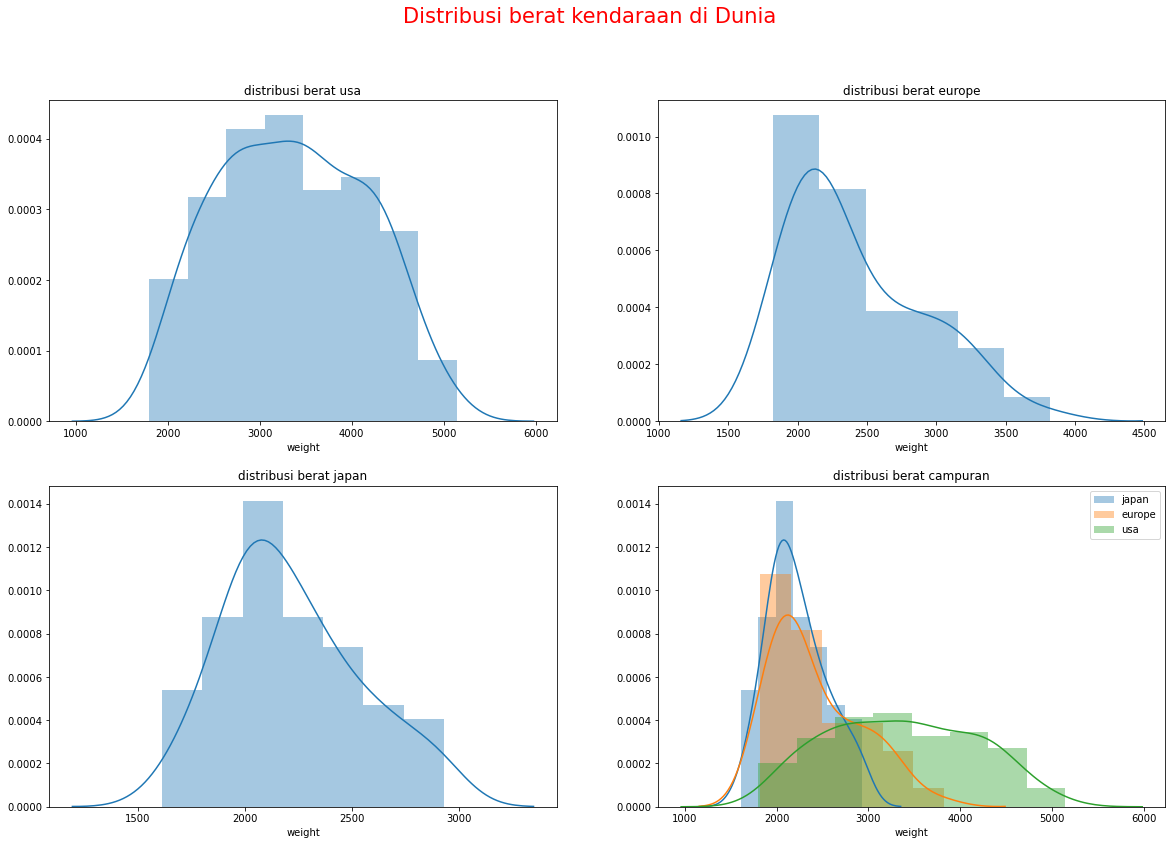

In [23]:
plt.figure(figsize=(20,13))
plt.suptitle('Distribusi berat kendaraan di Dunia',color='Red',size=21)
plt.subplot(2,2,1)
plt.title('distribusi berat usa')
sns.distplot(mpg[mpg['origin']=='usa']['weight'])
plt.subplot(2,2,2)
plt.title('distribusi berat europe')
sns.distplot(mpg[mpg['origin']=='europe']['weight'])
plt.subplot(2,2,3)
plt.title('distribusi berat japan')
sns.distplot(mpg[mpg['origin']=='japan']['weight'])
plt.subplot(2,2,4)
plt.title('distribusi berat campuran')
sns.distplot(mpg[mpg['origin']=='japan']['weight'],label='japan')
sns.distplot(mpg[mpg['origin']=='europe']['weight'],label='europe')
sns.distplot(mpg[mpg['origin']=='usa']['weight'],label='usa')
plt.legend()

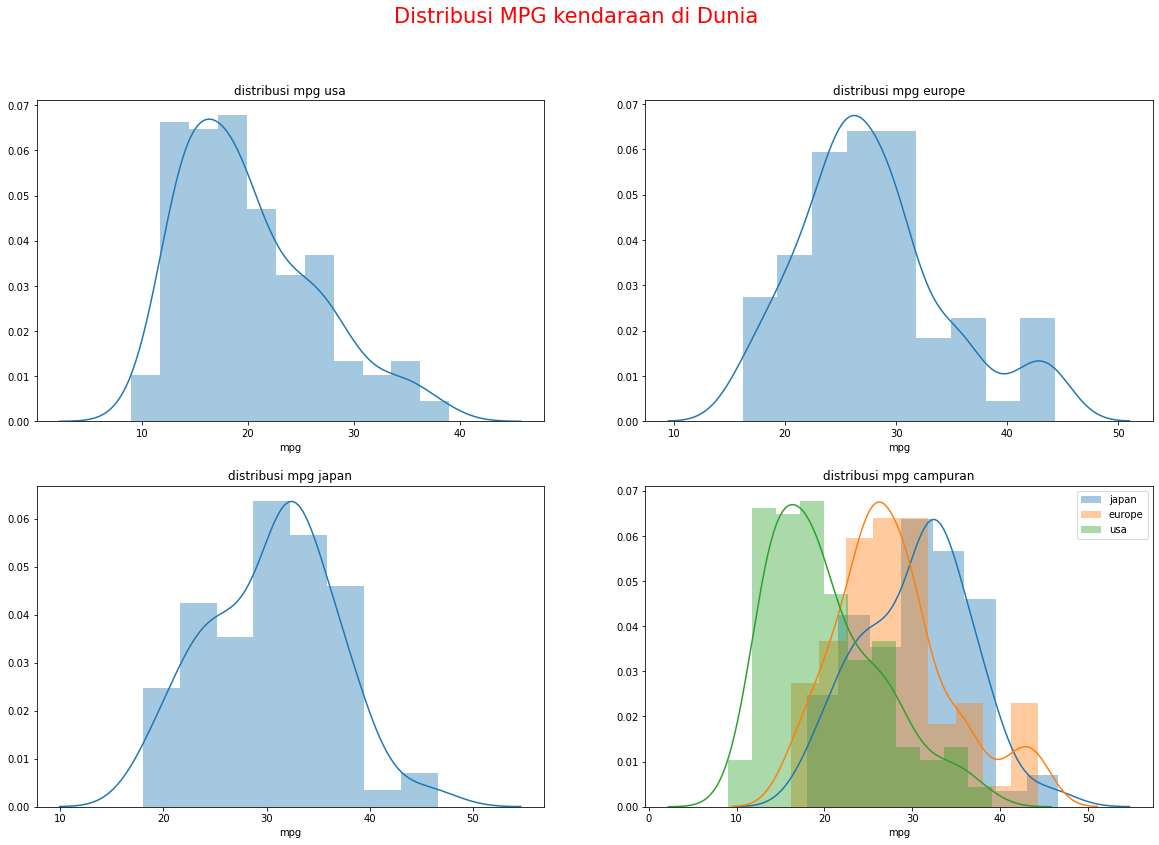

In [24]:
plt.figure(figsize=(20,13))
plt.suptitle('Distribusi MPG kendaraan di Dunia',color='Red',size=21)
plt.subplot(2,2,1)
plt.title('distribusi mpg usa')
sns.distplot(mpg[mpg['origin']=='usa']['mpg'])
plt.subplot(2,2,2)
plt.title('distribusi mpg europe')
sns.distplot(mpg[mpg['origin']=='europe']['mpg'])
plt.subplot(2,2,3)
plt.title('distribusi mpg japan')
sns.distplot(mpg[mpg['origin']=='japan']['mpg'])
plt.subplot(2,2,4)
plt.title('distribusi mpg campuran')
sns.distplot(mpg[mpg['origin']=='japan']['mpg'],label='japan')
sns.distplot(mpg[mpg['origin']=='europe']['mpg'],label='europe')
sns.distplot(mpg[mpg['origin']=='usa']['mpg'],label='usa')
plt.legend()

In [25]:
mpg[mpg['merk']=='bmw']['mpg'].mean()

23.75